### Лабораторная работа №1

1.	Любым удобным вам образом получите TLE аппарата **NOAA 19**

In [9]:
! pip install pyorbital
tle_file = "noaa19.txt"

2.	За положение антенны-наблюдателя для простоты проверки работ возьмем одинаковые координаты

In [10]:
# observer coordinates in degrees
obs_lat, obs_long, obs_alt = 55.75, 37.62, 0.1

3. Интересуемый временной диапазон тоже зададим сразу

In [11]:
from datetime import datetime, timedelta

start, end = datetime.now(), datetime.now() + timedelta(days=1)

print("Интересуемый диапазон: c {} до {}".format(start.strftime("%d.%m.%Y %H:%M:%S"), end.strftime("%d.%m.%Y %H:%M:%S")))

Интересуемый диапазон: c 29.03.2022 18:52:39 до 30.03.2022 18:52:39


**Если вам требуются координаты или даты в другом формате - конвертацию делать НЕ запрещено**

4. Рассчитайте положение аппарата в заданном временном диапазоне (минутного шага достаточно)<br>**Чтобы далее отобразить получившиеся координаты, сохраните их в список `ecis`**

In [12]:
# Ваш код
import numpy as np
import matplotlib.pyplot as plt
from pyorbital.orbital import Orbital
from pyorbital import tlefile
import pyorbital.orbital as p

a, b = 6378.137, 6356.7523142
sat = Orbital('NOAA 19', tle_file=tle_file)
j = start
ecis = []
while j <= end:
        tmp = sat.get_position(j, normalize=False)
        ecis.append(tmp[0])
        j += timedelta(minutes=1)
j = end
tmp = sat.get_position(j, normalize=False)
ecis.append(tmp[0])
print(ecis)

[array([-1034.55991993,  -518.86414978, -7151.64447203]), array([-1261.82896748,  -137.76427653, -7132.21598969]), array([-1484.35984981,   243.85284631, -7085.93827413]), array([-1701.31550213,   624.55399534, -7012.97859334]), array([-1911.87899221,  1002.90850404, -6913.603241  ]), array([-2115.25648223,  1377.49339778, -6788.17673581]), array([-2310.68012805,  1746.89852611, -6637.16069524]), array([-2497.41090792,  2109.7316796 , -6461.11238214]), array([-2674.74137213,  2464.62367768, -6260.68292232]), array([-2841.99830454,  2810.23341322, -6036.6151918 ]), array([-2998.54528655,  3145.25283835, -5789.74137289]), array([-3143.78515354,  3468.41187516, -5520.98017903]), array([-3277.16233337,  3778.48323379, -5231.33374945]), array([-3398.16505615,  4074.28711945, -4921.88421586]), array([-3506.32742416,  4354.6958088 , -4593.78994514]), array([-3601.2313308 ,  4618.63807566, -4248.28146377]), array([-3682.50821717,  4865.1034449 , -3886.65707156]), array([-3749.84065539,  5093.1

5. Отобразим получившиеся координаты

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axis', 'datetime', 'angle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<IPython.core.display.Javascript object>


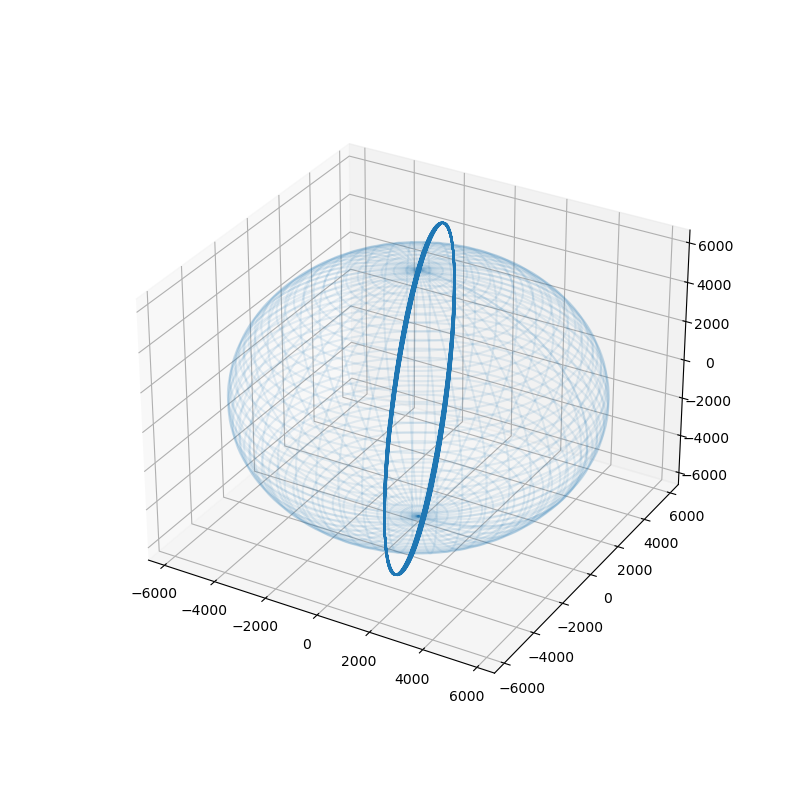

In [13]:
%pylab notebook

from mpl_toolkits.mplot3d import axes3d

a, b = 6378.137, 6356.7523142

ecis = np.array(ecis)
x, y, z = ecis[:, 0], ecis[:, 1], ecis[:, 2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z)

rx, ry, rz = a, a, b
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

ax.plot_wireframe(x, y, z, alpha=0.1)


max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

6. Получите прогноз видимости аппарата для антенны-наблюдателя (то есть посчитайте и выведите, в какие диапазоны времени антенна «видит» аппарат)

In [14]:
# Ваш код
passes = sat.get_next_passes(start, 24, obs_long, obs_lat, obs_alt)

for i in passes:
    print(i[0], "-", i[1])

2022-03-29 19:33:30.056423 - 2022-03-29 19:35:28.130957
2022-03-30 02:38:31.850049 - 2022-03-30 02:42:18.117588
2022-03-30 04:16:18.074822 - 2022-03-30 04:30:26.949676
2022-03-30 05:56:52.255921 - 2022-03-30 06:12:36.878426
2022-03-30 07:37:48.877813 - 2022-03-30 07:51:43.567215
2022-03-30 09:18:35.860658 - 2022-03-30 09:28:35.386743
2022-03-30 10:58:03.412172 - 2022-03-30 11:05:08.305311
2022-03-30 12:34:46.574176 - 2022-03-30 12:44:21.153697
2022-03-30 14:11:30.940925 - 2022-03-30 14:25:04.870309
2022-03-30 15:50:24.390928 - 2022-03-30 16:06:01.732286
2022-03-30 17:32:16.331960 - 2022-03-30 17:46:39.326365


7. В промежутки времени, когда аппарат «виден» для антенны, посчитайте требуемые для связи углы азимута и элевации в каждый момент времени

<IPython.core.display.Javascript object>


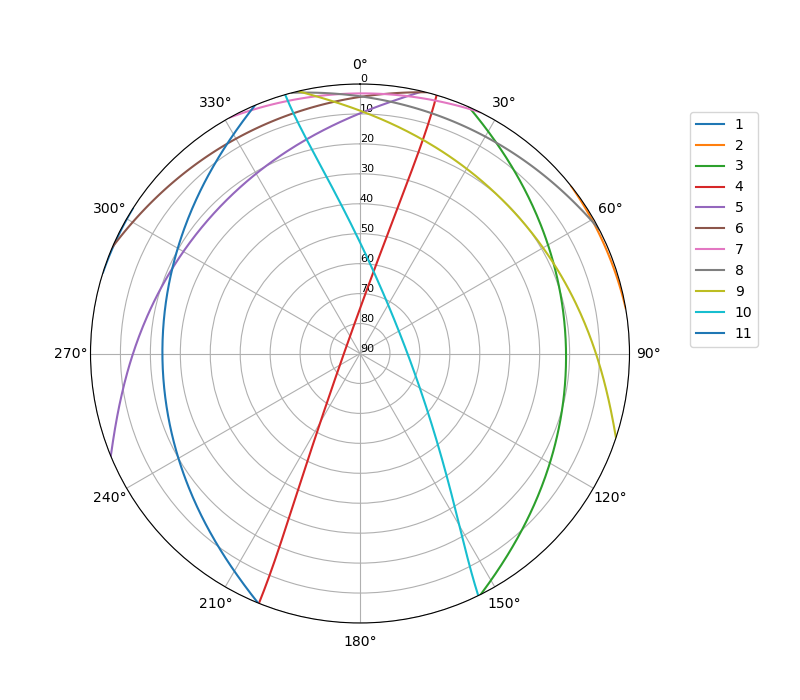

In [15]:
# Ваш код
fig, ax = plt.subplots(figsize=(8, 7), dpi=100, subplot_kw={'projection': 'polar'})


index = 1
for i in passes:
    az, el = [], []
    j = i[0]
    while j <= i[1]:
        tmp = sat.get_observer_look(j, obs_long, obs_lat, obs_alt)
        az.append(tmp[0])
        el.append(tmp[1])
        j += timedelta(seconds=5)
    tmp = sat.get_observer_look(i[1], obs_long, obs_lat, obs_alt)
    az.append(tmp[0])
    el.append(tmp[1])
    ax.plot(np.array(az) / 180 * np.pi, np.array(el), label=str(index))
    index += 1
    
ax.set_rlim(90, 0)
ax.set_rlabel_position(0)
ax.yaxis.set_tick_params(labelsize=8)
ax.set_theta_direction(-1)
ax.grid(True)
ax.set_theta_zero_location('N')
ax.set_thetagrids(np.arange(0.0, 360.0, 30.0))
angle = np.deg2rad(0)
ax.legend(loc="lower left", bbox_to_anchor=(.6 + np.cos(angle)/2, .5 + np.sin(angle)/2))
fig.subplots_adjust(left=0.0)
plt.show()

8. Отобразите на графике в полярных координатах азимут-элевация получившиеся углы.<br>Полярным радиусом в вашей системе будет угол элевации (90 градусов по элевации - центр полярной сетки)

In [ ]:
# Ваш код
